In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

# Elasticsearch issues analysis
## Main objective
Investigate whether issues have been used consistently over time and throughout the release versions of the software, and is therefore a reliable source of information to use when validating our anomaly predictions.

## Data loading

### Labels

In [2]:
issues_labels = pd.read_csv("./issues_labels.csv", index_col=0, squeeze=True)
issues_labels

,name,description
0,:Analytics/Aggregations,Aggregations
1,:Analytics/Geo,"Indexing, search aggregations of geo points an..."
2,:Analytics/Graph,Discover connections in your documents
3,:Analytics/Rollup,Turn fine-grained time-based data into coarser...
4,:Core/Features/CAT APIs,Text APIs behind /_cat
...,...,...
433,v7.8.2,NaN
434,v7.9.0,NaN
435,v7.9.1,NaN
436,v8.0.0,NaN


In [3]:
len(issues_labels)

438

### Issues

In [98]:
issues = pd.read_csv("./issues.csv", index_col=0, squeeze=True)
issues.created_at = issues.created_at.astype("datetime64")
issues

,title,created_at,user
id,,,
682740346,[7.9] [DOCS] Fix EQL threat detection example ...,2020-08-20 13:58:10,jrodewig
682739786,[7.x] [DOCS] Fix EQL threat detection example ...,2020-08-20 13:57:22,jrodewig
682737733,[DOCS] [7.8] Adding ignore_unavailable param. ...,2020-08-20 13:54:35,lockewritesdocs
682734621,[DOCS] [7.9] Adding ignore_unavailable param. ...,2020-08-20 13:50:36,lockewritesdocs
682732176,[DOCS] [7.x] Adding ignore_unavailable param. ...,2020-08-20 13:47:21,lockewritesdocs
...,...,...,...
23083082,Consistency between `_search` and `_msearch`,2013-11-21 17:33:06,ofavre
20864348,ActionResponse should implement ToXContentObject,2013-10-11 11:52:52,s1monw
20743479,"Get document API can specify an alias, but wil...",2013-10-09 13:56:33,ccw-morris


### Labels and issues 

In [5]:
ilpr = pd.read_csv("issues_label_per_row.csv", index_col=0)
ilpr

,id,label
0,681010786,backport
1,681010786,v7.9.1
2,681010233,backport
3,681010233,v7.10.0
4,680841671,:ml
...,...,...
166760,1400233,:Distributed/Distributed
166761,1400233,>feature
166762,1400233,Team:Distributed
166763,1400233,high hanging fruit


In [6]:
ilac = pd.read_csv("issue_labels_as_columns.csv", index_col=0)
ilac

,:Analytics/Aggregations,:Analytics/Geo,:Analytics/Graph,:Analytics/Rollup,:Core/Features/CAT APIs,:Core/Features/Data streams,:Core/Features/Features,:Core/Features/ILM+SLM,:Core/Features/Indices APIs,:Core/Features/Ingest,...,v7.7.0,v7.7.1,v7.7.2,v7.8.0,v7.8.1,v7.8.2,v7.9.0,v7.9.1,v8.0.0,won't fix
id,,,,,,,,,,,,,,,,,,,,,
681010786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
681010233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
680841671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
680827130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
680805162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23083082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20864348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20743479,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Tags

In [86]:
tags = pd.read_csv("./tags.csv", index_col=0)
tags.head()

,Tag,Sha,Date
0,v7.9.0,a479a2a7fce0389512d6a9361301708b92dff667,2020-08-11 16:42:47
1,v7.8.1,b5ca9c58fb664ca8bf9e4057fc229b3396bf3a89,2020-07-21 12:13:59
2,v7.8.0,757314695644ea9a1dc2fecd26d1a43856725e65,2020-06-12 22:39:07
3,v7.7.1,ad56dce891c901a492bb1ee393f12dfff473a423,2020-05-28 13:52:12
4,v7.7.0,81a1e9eda8e6183f5237786246f6dced26a10eaf,2020-05-08 23:11:19


In [88]:
tags.Date = tags.Date.astype("datetime64")

In [8]:
len(tags)

280

### Tags and issues count

In [9]:
# format data
tic = []
for index, tag in tags.iterrows():
    tic.append((tag.Tag, len(ilpr[ilpr["label"]==tag.Tag].id.unique())))

In [10]:
# create a dataframe for easy manipulation
tagsIssueCountDf = pd.DataFrame(tic, columns=["Tag", "Issues"])
tagsIssueCountDf

,Tag,Issues
0,v7.9.0,1553
1,v7.8.1,409
2,v7.8.0,986
3,v7.7.1,346
4,v7.7.0,1331
...,...,...
275,v0.7.0,0
276,v0.6.0,0
277,v0.5.1,0
278,v0.5.0,0


## Data cleaning
Inspect the data for mistakes

### Labels
Let's start by listing the least used labels. These may be misspelled labels which may represent duplicates and therefore only used few times.

In [11]:
cnt = ilpr.groupby("label").count()
cnt = cnt.reset_index()
cnt[(cnt.id < 5)].sort_values(by="id").head(10)

,label,id
178,v0.19.6,1
150,v0.17.4,1
160,v0.18.4,1
135,v0.14.3,1
133,v0.14.1,1
152,v0.17.6,1
184,v0.20.1,1
157,v0.18.1,1
76,Dependency:Endpoint,1
55,:Security/IdentityProvider,1


Let's filter out the labels representing versions (starting with v) as we believe they do not represent mistakes

In [12]:
cnt[(~cnt.label.str.startswith("v"))&(cnt.id < 3)]

,label,id
55,:Security/IdentityProvider,1
76,Dependency:Endpoint,1
89,Team:Performance,2
96,[>test-mute],2


It looks like these labels are correctly spelled.
Let's check if any of these labels are misformatted or have been replace with a new label using another convention

In [13]:
issues_labels[issues_labels.name.str.contains("mute", flags=re.IGNORECASE) |
             issues_labels.name.str.contains("identity", flags=re.IGNORECASE)|
             issues_labels.name.str.contains("provider", flags=re.IGNORECASE)|
             issues_labels.name.str.contains("performance", flags=re.IGNORECASE)|
             issues_labels.name.str.contains("dependency", flags=re.IGNORECASE)]

,name,description
41,:Performance,All issues related to Elasticsearch performanc...
55,:Security/IdentityProvider,Identity Provider (SSO) project in X-Pack
73,>test-mute,Use for PR that only mute tests
76,Dependency:Endpoint,NaN
77,Dependency:SIEM,NaN
89,Team:Performance,Meta label for performance team
96,[>test-mute],NaN


In [14]:
cnt[cnt.label.str.contains("test-mute")]

,label,id
73,>test-mute,475
96,[>test-mute],2


The only label which seems to be a mistake is **[>test-mute]** which we decide to replace with the more popular **>test-mute**

In [15]:
ilpr.label = ilpr.label.replace({"[>test-mute]":">test-mute"})

## Analysis
* Identify types of labels
* Quantify the number of issues and the their statistics over tags (mean, median, outliers, distributions)

### Issues

In [16]:
len(ilac)

61103

We have in total 61103 issues

### Labels

In [17]:
len(issues_labels)

438

#### Type of labels
We were not able to find documentation for the type and convention for issue labels.
By exploring the labels however, we identified some patterns which may help us focus our analysis.

* **Sw versions** Labels representing specific sw versions have the format "vX.Y.Z"
* **Major categories** These labels start with the sign ">"
* **Specific topics** Thes labels start with the sign ":"

We believe there is a hierarchy in labelling issues as follows: Major category -> topic

#### Topics

In [18]:
topic_labels = issues_labels[(issues_labels.name.str.startswith(":"))].name
topic_labels.unique()

array([':Analytics/Aggregations', ':Analytics/Geo', ':Analytics/Graph',
       ':Analytics/Rollup', ':Core/Features/CAT APIs',
       ':Core/Features/Data streams', ':Core/Features/Features',
       ':Core/Features/ILM+SLM', ':Core/Features/Indices APIs',
       ':Core/Features/Ingest',
       ':Core/Features/Java High Level REST Client',
       ':Core/Features/Java Low Level REST Client',
       ':Core/Features/Monitoring', ':Core/Features/Stats',
       ':Core/Features/Watcher', ':Core/Infra/Build',
       ':Core/Infra/Circuit Breakers', ':Core/Infra/Core',
       ':Core/Infra/Logging', ':Core/Infra/Packaging',
       ':Core/Infra/Plugins', ':Core/Infra/REST API',
       ':Core/Infra/Resiliency', ':Core/Infra/Scripting',
       ':Core/Infra/Settings', ':Core/Infra/Transport API',
       ':Distributed/Allocation', ':Distributed/Autoscaling',
       ':Distributed/CCR', ':Distributed/CRUD',
       ':Distributed/Cluster Coordination',
       ':Distributed/Discovery-Plugins', ':Distribute

#### Categories

In [19]:
category_labels = issues_labels[(issues_labels.name.str.startswith(">"))].name
category_labels.unique()

array(['>breaking', '>breaking-java', '>bug', '>deprecation', '>docs',
       '>enhancement', '>feature', '>non-issue', '>refactoring',
       '>regression', '>test', '>test-failure', '>test-mute', '>upgrade'],
      dtype=object)

#### All labels which do not represent versions

In [20]:
labels_no_version = issues_labels[~(issues_labels.name.str.startswith("v"))].name
labels_no_version.describe()

count          120
unique         120
top       backport
freq             1
Name: name, dtype: object

#### Labels which are neither tags, topics or categories

In [21]:
left_out_labels = issues_labels[~(issues_labels.name.str.startswith("v")) &
                               ~(issues_labels.name.isin(category_labels)) &
                               ~(issues_labels.name.isin(topic_labels))]
left_out_labels

,name,description
75,Awaiting CLA,NaN
76,Dependency:Endpoint,NaN
77,Dependency:SIEM,NaN
78,Meta,NaN
79,PITA,NaN
80,Pioneer Program,NaN
81,Pretty Bloody Important,NaN
82,Team:Analytics,Meta label for analytics/geo team
83,Team:Clients,Meta label for clients team
84,Team:Core/Features,Meta label for core/features team


#### Quantify overlapping of the same label groups

In [22]:
(ilpr[ilpr.label.isin(category_labels)].groupby("id").count() > 1).sum() / len(ilpr.id.unique())

label    0.039191
dtype: float64

In [23]:
(ilpr[ilpr.label.isin(topic_labels)].groupby("id").count() > 1).sum() / len(ilpr.id.unique())

label    0.029571
dtype: float64

Indeed only the 3% and 4% have two labels of the same group

**Observations**
* Our intuition regarding the convention for labels seems to hold
* The labels "left out" from the convention indeed seem to be internal labels, used to assign issues to some specific teams (Team:) or specify even further the specific issue type (jdk)
* We quantified how many issues have more than one label of the same group and this resulted in a very low number (3% and 4%). The overlapping is of course allowed and in some cases needed, but this low number confirms our intuition on the convention since in 97% of the cases only one label per group is used
* Given the high number of labels and the low overlap of the ones in the same group, it seems to make sense to analyze these macro groups separately

### Tags and issues

In [24]:
tagsIssueCountDf.describe()

,Issues
count,280.000000
mean,163.996429
std,478.836250
min,0.000000
25%,13.000000
50%,32.000000
75%,90.000000
max,5707.000000


The percentiles (75th is 90) are low compared to the mean (163). This indicates the presence of outliers which influence the mean. Indeed the max value is very high with 5707 and we have a large standard deviation.

Let's plot these in a box plot to confirm our intuition

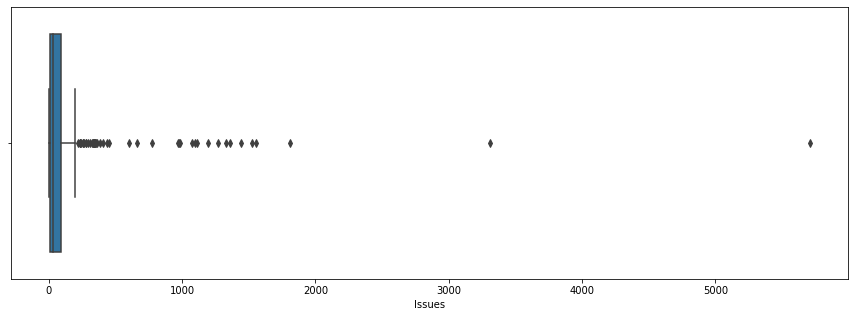

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(tagsIssueCountDf.Issues)

In [26]:
from matplotlib.cbook import boxplot_stats
outliers = [y for stat in boxplot_stats(tagsIssueCountDf.Issues) for y in stat['fliers']]
len(outliers)

45

The box plots confirms the presence of outlier. There are 45 of them. It means that there are 45 tags with many issues compared to most of the tags which have a mean around 163 and a median of 32. These could be possibly very defected releases. Among these v7.0.0-beta1 results the tag with most issues.

In [27]:
outliersDf = tagsIssueCountDf.sort_values(by="Issues", ascending=False).head(45)
outliersDf.head(10)

,Tag,Issues
25,v7.0.0-beta1,5707
145,v2.0.0-beta1,3311
18,v7.2.0,1806
0,v7.9.0,1553
76,v6.0.0-alpha1,1525
120,v5.0.0-alpha1,1441
7,v7.6.0,1358
4,v7.7.0,1331
13,v7.4.0,1267
51,v6.5.0,1193


In [28]:
len(outliersDf[outliersDf.Tag.str.contains("alpha") |
               outliersDf.Tag.str.contains("rc") |
               outliersDf.Tag.str.contains("beta")]) / len(outliers)

0.26666666666666666

26% of the outliers are alpha/beta/rc versions. The rest are official releases.

**Observation** The number of issue per each tag is not evenly distributed. A high concentration of tags with fewer than 100 issues while 45 outliers exceed the value 200 going all the way to 5707. Only 26% of these outliers are not final releases (alpha beta and rc). while the rest are.
The number of issues for these tags may depend on 
* How buggy these releases were
* How popular these releases were

### Explore the distribution of issues throughout the different tags
* Is the number of issues evenly distributed over the tags (and therefore over time)?
* What are the most issue reported versions? Are they concentrated in some specific periods (old or recent releases)?

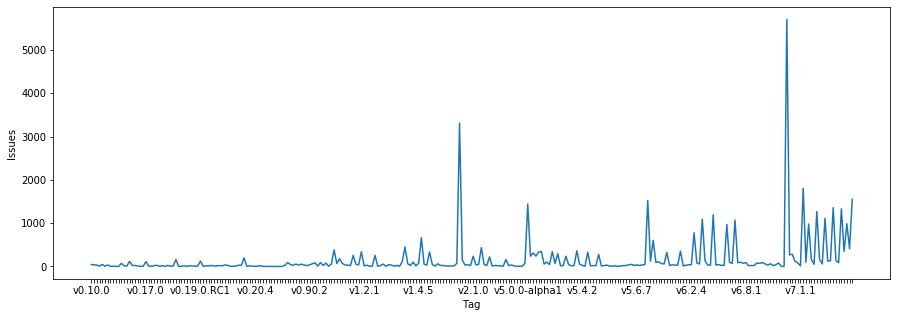

In [29]:
plt.figure(figsize=(15,5))
plt.locator_params(axis='x', nbins=6)
ax = sns.lineplot(x="Tag", y="Issues", data=tagsIssueCountDf.head(280))
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Let's investigate the first peak around version v1.0.0 at what tag it belongs to.

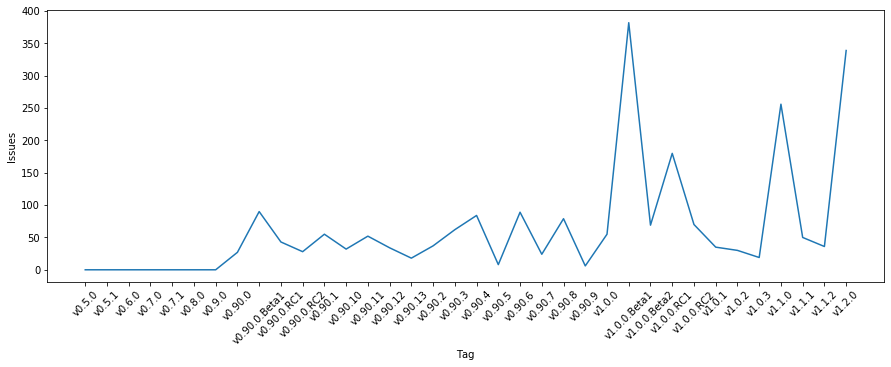

In [30]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x="Tag", y="Issues", data=tagsIssueCountDf[(tagsIssueCountDf.Tag < "v1.2.1") & (tagsIssueCountDf.Tag > "v0.5")])
ax.tick_params(axis='x', labelrotation= 45)

We can see that it indeed belongs to v1.0.0.

#### Comparison of below-v1 and above-v1

Let's compare the statistics of version below and above v1.0.0 to quantify the differences in number of issues
* Has there been a change in the use of the ITS from version 1 and above?

In [31]:
tagsIssueCountDf[(tagsIssueCountDf.Tag < "v1.0.0")].describe()

,Issues
count,88.000000
mean,26.306818
std,36.415974
min,0.000000
25%,4.000000
50%,14.000000
75%,32.000000
max,197.000000


In [32]:
tagsIssueCountDf[(tagsIssueCountDf.Tag >= "v1.0.0")].describe()

,Issues
count,192.000000
mean,227.104167
std,567.080832
min,0.000000
25%,21.000000
50%,49.000000
75%,159.250000
max,5707.000000


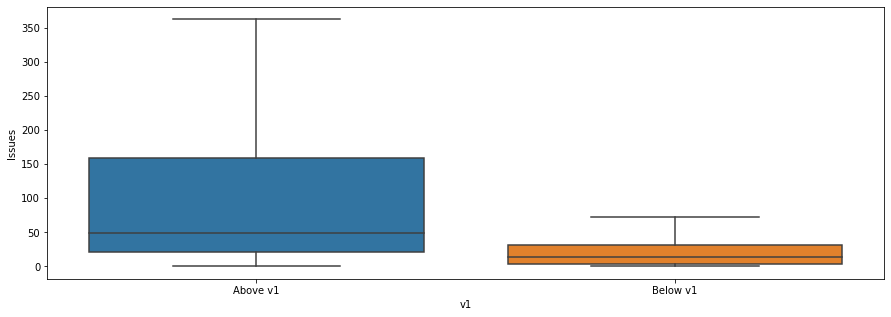

In [33]:
plt.figure(figsize=(15,5))
tagsv1 = pd.DataFrame(tagsIssueCountDf.Issues)
tagsv1["v1"] = tagsIssueCountDf.Tag.apply(lambda tag: "Below v1" if tag < "v1.0.0" else "Above v1")
# Some outliers from Above v1 have been removed for readibility
ax = sns.boxplot(x="v1", y="Issues", data=tagsv1, showfliers=False)

**Observation** By plotting the number of issues for each tag sorted in an ascending order, we notice that the versions up to roughly v1.0.0 have few issues compared to the versions coming after. Statistical summaries show that the mean of "below v1" is 26 whereas "above v1" is 227 which is even larger than the maximum value of "below v1". This shows an increasing trend of more issues with versions above v1.

In order to assess this impression, we need to plot statistics at a finer grain.

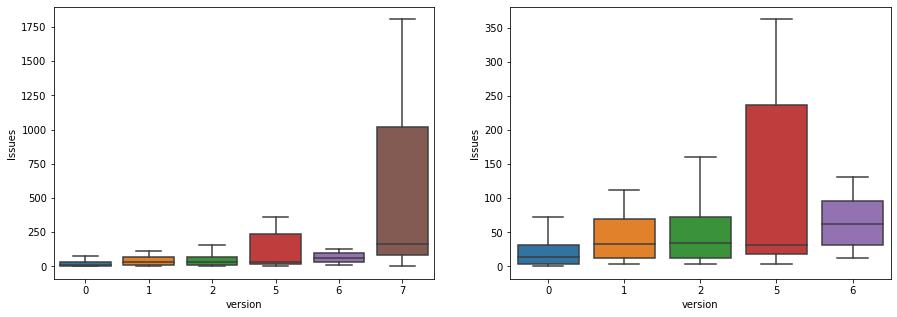

In [34]:
f, axes = plt.subplots(1,2, figsize=(15,5))
def version(tag):
    for i in range(8):
        if((tag > f"v{i}") & (tag < f"v{i+1}")):
            return i
tagsv = pd.DataFrame(tagsIssueCountDf.Issues)
tagsv["version"] = tagsIssueCountDf.Tag.apply(version)
ax = sns.boxplot(ax=axes[0], x="version", y="Issues", data=tagsv, showfliers = False)
ax = sns.boxplot(ax=axes[1], x="version", y="Issues", data=tagsv[tagsv.version <7], showfliers = False)

***Observations***
-  Given the high number of tags, we had to group them in a meaningful way. We believe that major versions is a good compromise as it preserves the temporal trend and as that is what we are interested in: verify if the ITS has been used consistently over time.
- Our first observation turned out to be biased by versions 6 and 7 which do have significantly more issues and were therefore contributing in altering the "abvove v1" statistics. When we plot boxplots for tags grouped by each major version, we see that the v0 one does not differ much from the ones of v1 and v2. It is slightly lower in median and percentiles.

This could be due to different reasons:

* Versions below v1.0.0 were not widely adopted and therefore received fewer issues from users
* Elasticsearch was not extensively using Github ITS as their main ITS
* Those versions presented indeed fewer issues, possibly due to the fewer features implemented

**Conclusions**
* Elasticsearch seems to have used the ITS consistently over time and through the different versions. There has been a slightly increase over time and version 7 presents many more issues than ever before. This is probably due to either more bugs or major features implemented, as well as more popularity obtained by the project.


**Other observations**
- Elasticsearch has jumped from major version 2 to version 5 skipping 3 and 4

In [35]:
versions = [0,1,2,5,6,7]

###  Labels for versions with no tag

List labels which do not correspond to a Tag

In [36]:
len(issues_labels[~issues_labels.name.isin(tags.Tag)])

169

Of these labels, list the ones which do not have a tag associated

In [37]:
no_tag_version_labels = issues_labels[(~issues_labels.name.isin(tags.Tag)) & (issues_labels.name.str.startswith("v"))].name
len(no_tag_version_labels)

49

Count how many issues are labelled with these labels

In [38]:
len(ilpr[ilpr.label.isin(no_tag_version_labels.values)])

12938

In [39]:
issue_indexes = ilpr[ilpr.label.isin(no_tag_version_labels.values)].id.unique().tolist()

These labels seem to be associated with internal versions which did not end up getting tagged and released.
How many of these issues are associated only with this label as version? Issues may be labelled with more versions

We first select only the interested issues. We then filter out all the labels not being versions and remove the ones not associated with tags. We are left with the count of labels associated with these issues which are tags. All of them have more than 2 of these.

In [40]:
#issues associated also with valid tag labels
with_valid_tag = ilpr[ilpr.id.isin(issue_indexes) & 
    ilpr.label.str.startswith("v") & 
    ~ilpr.label.isin(no_tag_version_labels)].id.unique().tolist()

In [41]:
1 - len(set(issue_indexes)^set(with_valid_tag)) / len(ilpr[ilpr.label.isin(no_tag_version_labels.values)])

0.7879115782964909

**Observations**
* Some of the labels representing versions (following the vX.Y.Z convention) do not have a corrisponding tag
* The 78% of these issues labeled with these version-label are also associated with a valid tag label
* The rest of these issues may have been present in some versions which did not end up being tagged as releases. This should not represent a problem in our analysis

## Issues distributions

### Number of labels per issues
* The distribution of number of labels per issue

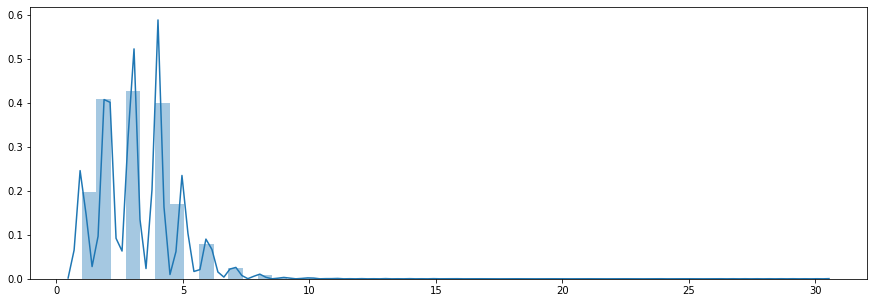

In [42]:
plt.figure(figsize=(15,5))
sns.distplot(ilpr.groupby("id").count())

* Most of the issues have between 1 and 5 labels
* The distribution seems to have a long tail with issues with around 30 labels.

Let's inspect the outliers

In [43]:
tmp = ilpr.groupby("id").count() > 25

In [44]:
issues.loc[tmp[tmp.label].index]

,title,created_at,user
id,,,
406385566,Docs: Drop inline callout from scroll example,2019-02-04 15:35:59,nik9000
419578480,Docs: Drop inline callouts from the java API,2019-03-11 16:57:45,nik9000
428388084,Docs: Move id in the java-api,2019-04-02 18:55:08,nik9000


In [45]:
for issue in issues.loc[tmp[tmp.label].index].itertuples():
    print(ilpr[ilpr.id == issue.Index].label.tolist())

['>docs', 'v1.3.10', 'v1.4.5', 'v1.5.3', 'v1.6.3', 'v1.7.6', 'v2.0.3', 'v2.1.3', 'v2.2.2', 'v2.3.6', 'v2.4.7', 'v5.0.3', 'v5.1.3', 'v5.2.3', 'v5.3.3', 'v5.4.4', 'v5.5.4', 'v5.6.14', 'v6.0.3', 'v6.1.5', 'v6.2.5', 'v6.3.3', 'v6.4.4', 'v6.5.0', 'v6.6.1', 'v6.7.0', 'v7.0.0-beta1']
[':Core/Infra/Transport API', '>docs', 'v1.4.5', 'v1.5.3', 'v1.6.3', 'v1.7.6', 'v2.0.3', 'v2.1.3', 'v2.2.2', 'v2.3.6', 'v2.4.7', 'v5.0.3', 'v5.1.3', 'v5.2.3', 'v5.3.3', 'v5.4.4', 'v5.5.4', 'v5.6.17', 'v6.0.3', 'v6.1.5', 'v6.2.4', 'v6.3.3', 'v6.4.4', 'v6.5.5', 'v6.6.3', 'v6.7.1', 'v7.0.0-rc2', 'v7.2.0', 'v8.0.0']
['>docs', 'v0.90.14', 'v1.3.10', 'v1.4.5', 'v1.5.3', 'v1.6.3', 'v1.7.6', 'v2.0.3', 'v2.1.3', 'v2.2.2', 'v2.3.6', 'v2.4.7', 'v5.0.3', 'v5.1.3', 'v5.2.3', 'v5.3.3', 'v5.4.4', 'v5.5.4', 'v5.6.17', 'v6.0.3', 'v6.1.5', 'v6.2.5', 'v6.3.3', 'v6.4.4', 'v6.5.5', 'v6.6.3', 'v6.7.1', 'v7.0.0-rc2', 'v7.2.0', 'v8.0.0']


**Observation**
* They are all **docs** related issues
* We observe that the 3 outliers share the common trait of having a large number of version labels. This means that the large number of labels is due to the large number of versions affected by these docs related requests.  

* The distribution of number of **version** labels per issue

Text(0.5, 1.0, 'Only tag labels')

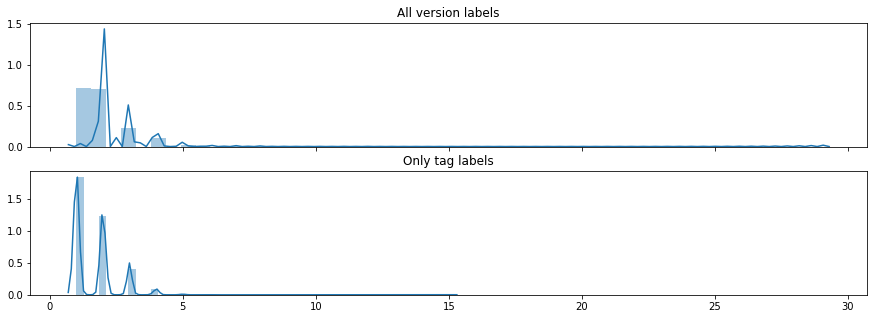

In [46]:
f, axes = plt.subplots(2, figsize=(15,5), sharex=True)
sns.distplot(ilpr[ilpr.label.str.startswith("v")].groupby("id").count(), ax=axes[0])
sns.distplot(ilpr[ilpr.label.isin(tags.Tag)].groupby("id").count(), ax=axes[1])
axes[0].set_title("All version labels")
axes[1].set_title("Only tag labels")

In [47]:
ilpr[ilpr.label.str.startswith("v")].groupby("id").count().describe()

,label
count,30406.000000
mean,1.935703
std,1.121134
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,29.000000


In [48]:
ilpr[ilpr.label.isin(tags.Tag)].groupby("id").count().describe()

,label
count,27662.000000
mean,1.660003
std,0.815891
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,15.000000


It is interesting to notice the different distribution if we only look at tag labels.
The tail of the distribution is shorter and both the median and std are smaller.
This means that when looking at tags (releases), issues tend to affect fewer of them (50% of the issues affect only one) than when compared to versions in general. In the latter case the mean is close to 2, meaning that issues tend to affect more versions than releases.  

### Category distributions
* What are the most popular category labels?
* Do some versions present more issues of a specific category?

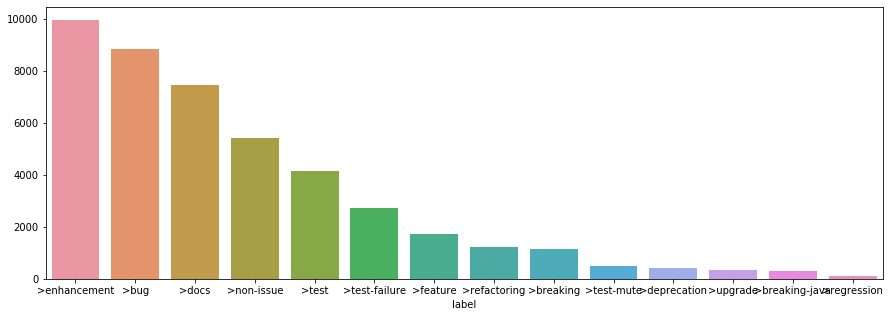

In [49]:
plt.figure(figsize=(15,5))
cat_count = ilpr[ilpr.label.isin(category_labels)].groupby("label").id.count().sort_values(ascending=False)
ax = sns.barplot(x=cat_count.index, y=cat_count.values)

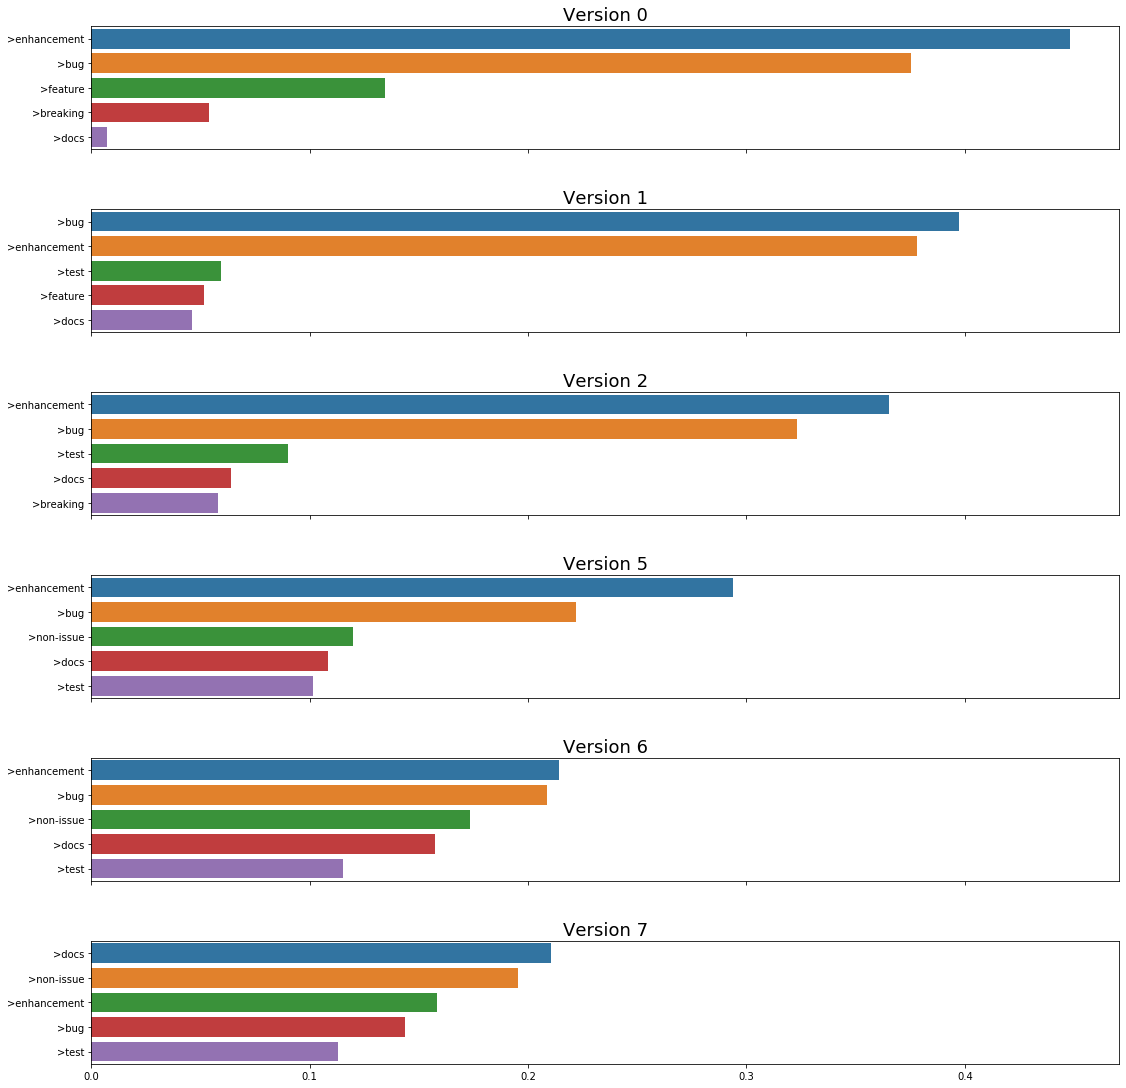

In [50]:
head = 5
fig, axes = plt.subplots(len(versions), figsize=(15,15), sharex='col')
fig.tight_layout(h_pad=5.0)
for i in range(len(versions)):
    issues_for_version = ilpr[ilpr.label.str.startswith(f"v{versions[i]}")].id.unique()
    issues_type_for_version = (ilpr[ilpr.id.isin(issues_for_version) & 
                               ilpr.label.isin(category_labels)].groupby("label").id.count() / len(issues_for_version)).sort_values(ascending=False)
    ax = sns.barplot(ax=axes[i], y=issues_type_for_version.head(head).index.tolist(),
                     x=issues_type_for_version.head(head).values)
    #ax.tick_params(axis='x', labelrotation= 45)
    ax.set_title(f"Version {versions[i]}", fontdict={'fontsize': 18, 'fontweight': 'medium'})

**Observations**
* enhancement, bug and docs have been the most prevalent labels in this group
* enhancement and bug have been by far the most used labels in this group 
* Over time this has slowly decreased to a point where in version 7 bug is only the 4th most used label

### Topics distribution
* What are the most popular topic labels?
* Do some versions present more issues of a specific topic?

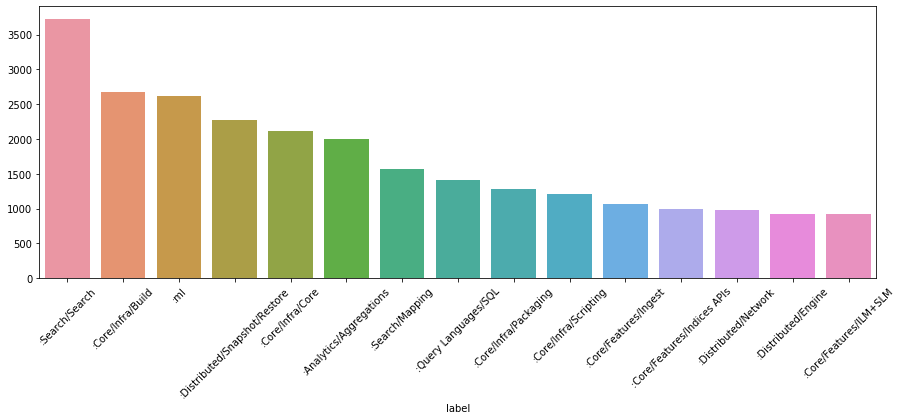

In [51]:
plt.figure(figsize=(15,5))
top_topic_labels = ilpr[ilpr.label.isin(topic_labels)].groupby("label").id.count().sort_values(ascending=False).head(15)
ax = sns.barplot(x=top_topic_labels.index, y=top_topic_labels.values)
ax.tick_params(axis='x', labelrotation= 45)

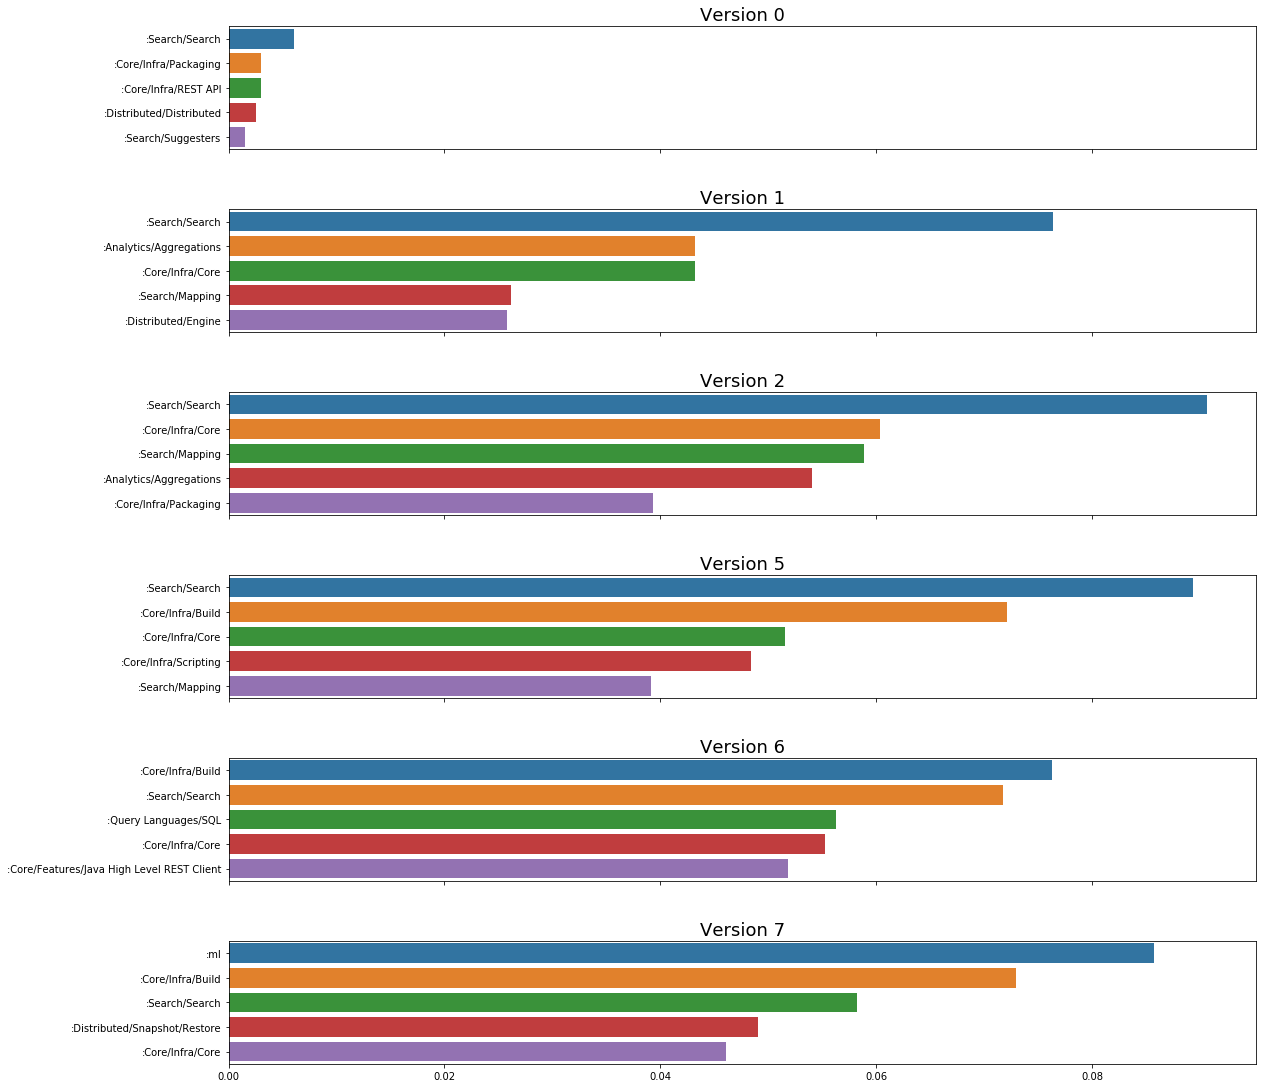

In [52]:
head = 5
fig, axes = plt.subplots(len(versions), figsize=(15,15), sharex='col')
fig.tight_layout(h_pad=5.0)
for i in range(len(versions)):
    issues_for_version = ilpr[ilpr.label.str.startswith(f"v{versions[i]}")].id.unique()
    issues_type_for_version = (ilpr[ilpr.id.isin(issues_for_version) & 
                               ilpr.label.isin(topic_labels)].groupby("label").id.count() / len(issues_for_version)).sort_values(ascending=False)
    ax = sns.barplot(ax=axes[i], y=issues_type_for_version.head(head).index.tolist(),
                     x=issues_type_for_version.head(head).values)
    #ax.tick_params(axis='x', labelrotation= 45)
    ax.set_title(f"Version {versions[i]}", fontdict={'fontsize': 18, 'fontweight': 'medium'})

**Observations**
* Search/Search is by far the most popular label in the topic group over all issues
* Version 0 did not present many issues labeled with topic labels
* From version 1 we see a more extensive use of topic labels
* Search/Search is in the top labels for all versions. This does not surprise given the nature of elasticsearch
* Machine learning has gained popularity and we can see that it is the top label for the most recent version whereas it was not present in the top labels of the previous versions
* The opposite has happened for Analytics/Aggregation which has slowly lost popularity since version 5

### Preliminary releases vs Official

* Do intermidiate releases (alpha, beta and rc) receive less issues?
* Do they present more of some specific types of issues?

In [53]:
preliminary_releases = tags[tags.Tag.str.contains("alpha") | 
                      tags.Tag.str.contains("beta") |
                      tags.Tag.str.contains("rc")]
preliminary_releases.head()

,Tag,Sha,Date
23,v7.0.0-rc2,f076a79831c97c82249851f209aff6fa24a97a4d,2019-04-02 15:00:22
24,v7.0.0-rc1,486505d65bdbd2a324242b64783ad87605b2d693,2019-03-22 18:24:22
25,v7.0.0-beta1,15bb494041370cf0f6b4414e37be6fb7a30a06cd,2019-02-13 09:07:16
26,v7.0.0-alpha2,a30e8c2fa3a8ee381c4fa6eae550681fee764cf5,2018-12-15 06:34:54
27,v7.0.0-alpha1,76cefb06e31967c6db2bdb827871e8d40741473a,2018-11-13 09:57:12


In [54]:
official_tags = tags[~tags.Tag.isin(preliminary_releases.Tag)]
official_tags.head()

,Tag,Sha,Date
0,v7.9.0,a479a2a7fce0389512d6a9361301708b92dff667,2020-08-11 16:42:47
1,v7.8.1,b5ca9c58fb664ca8bf9e4057fc229b3396bf3a89,2020-07-21 12:13:59
2,v7.8.0,757314695644ea9a1dc2fecd26d1a43856725e65,2020-06-12 22:39:07
3,v7.7.1,ad56dce891c901a492bb1ee393f12dfff473a423,2020-05-28 13:52:12
4,v7.7.0,81a1e9eda8e6183f5237786246f6dced26a10eaf,2020-05-08 23:11:19


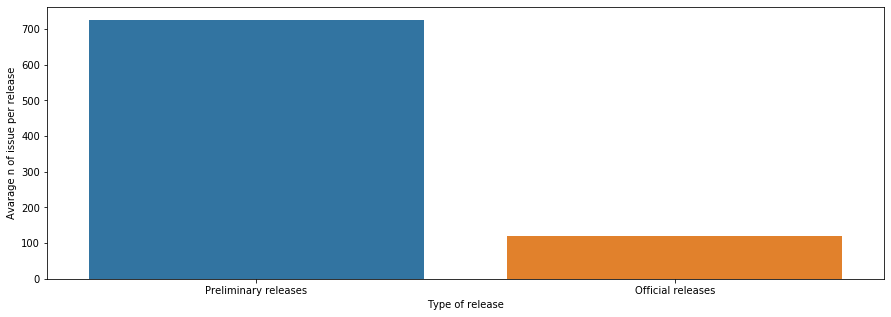

In [55]:
plt.figure(figsize=(15,5))
type_tag_count = [("Preliminary releases", len(ilpr[ilpr.label.isin(preliminary_releases.Tag)])/len(preliminary_releases.Tag)),
                  ("Official releases", len(ilpr[ilpr.label.isin(official_tags.Tag)])/len(official_tags.Tag))]
type_release_issue_count = pd.DataFrame(type_tag_count, columns=["Type of release", "Avarage n of issue per release"])
sns.barplot(x="Type of release", y="Avarage n of issue per release", data=type_release_issue_count)

**Observation**
Preliminary releases do receive significantly more bugs than offical releases.<br/>
This can be expected due to their nature of being "test" releases and not fully ready to be released.

* How many of the issues on preliminary releases ended up being reported on official releases as well?

In [56]:
issue_prel_off = list(set.intersection(set(ilpr[ilpr.label.isin(official_tags.Tag)].id.unique()), set(ilpr[ilpr.label.isin(preliminary_releases.Tag)].id.unique())))
len(issue_prel_off) / len(ilpr[ilpr.label.isin(preliminary_releases.Tag)].id.unique()) * 100

62.44867739112876

62% of the issues assigned on a preliminary release are also assigned to an official release.


This can both mean:
* that issues occured for the first time in a preliminary version but were not fixed before releasing the official version
* Issues were present in an official release but were not fixed before tagging the following preliminary release

Let's investigate how often these two cases happen. We will focus our analysis on bugs only as this is what our final goal will mainly focus on.

In [57]:
bug_issues = ilpr[ilpr.id.isin(ilpr[ilpr.label == ">bug"].id)]

In [58]:
x = pd.merge(bug_issues, preliminary_releases, left_on="label", right_on="Tag")
x = x.rename(columns={"Date":"Preliminary_release_date"})

In [59]:
y = pd.merge(bug_issues, official_tags, left_on="label", right_on="Tag").groupby("id").Date.min()

In [60]:
z = pd.DataFrame(y)
z = z.rename(columns={"Date":"Official_release_date"})

In [61]:
w = pd.merge(x, z, on="id")

Issues which appeared first in the preliminary release and afterwards also in an official one.

In [62]:
w[w.Preliminary_release_date < w.Official_release_date]

,id,label,Tag,Sha,Preliminary_release_date,Official_release_date
0,429676052,v7.0.0-rc2,v7.0.0-rc2,f076a79831c97c82249851f209aff6fa24a97a4d,2019-04-02 15:00:22,2019-04-05 21:42:14
2,427296936,v7.0.0-rc2,v7.0.0-rc2,f076a79831c97c82249851f209aff6fa24a97a4d,2019-04-02 15:00:22,2019-04-29 03:58:47
3,427124926,v7.0.0-rc2,v7.0.0-rc2,f076a79831c97c82249851f209aff6fa24a97a4d,2019-04-02 15:00:22,2019-04-29 03:58:47
7,425970784,v7.0.0-rc2,v7.0.0-rc2,f076a79831c97c82249851f209aff6fa24a97a4d,2019-04-02 15:00:22,2019-06-20 12:10:21
8,425948413,v7.0.0-rc2,v7.0.0-rc2,f076a79831c97c82249851f209aff6fa24a97a4d,2019-04-02 15:00:22,2019-06-20 12:10:21
...,...,...,...,...,...,...
1648,99201860,v2.0.0-beta1,v2.0.0-beta1,bfa3e47383d0adc690329a2fa1094ceb64cae651,2015-08-24 08:26:49,2015-09-14 09:48:05
1649,99176061,v2.0.0-beta1,v2.0.0-beta1,bfa3e47383d0adc690329a2fa1094ceb64cae651,2015-08-24 08:26:49,2015-09-14 09:48:05
1650,98732110,v2.0.0-beta1,v2.0.0-beta1,bfa3e47383d0adc690329a2fa1094ceb64cae651,2015-08-24 08:26:49,2015-09-14 09:48:05
1651,97748933,v2.0.0-beta1,v2.0.0-beta1,bfa3e47383d0adc690329a2fa1094ceb64cae651,2015-08-24 08:26:49,2015-09-14 09:48:05


Issues which appeared first in an official release and afterwards also in a preliminary one.

In [63]:
w[w.Preliminary_release_date > w.Official_release_date]

,id,label,Tag,Sha,Preliminary_release_date,Official_release_date
1,428131971,v7.0.0-rc2,v7.0.0-rc2,f076a79831c97c82249851f209aff6fa24a97a4d,2019-04-02 15:00:22,2019-04-02 14:32:27
4,426878538,v7.0.0-rc2,v7.0.0-rc2,f076a79831c97c82249851f209aff6fa24a97a4d,2019-04-02 15:00:22,2019-04-02 14:32:27
5,426250137,v7.0.0-rc2,v7.0.0-rc2,f076a79831c97c82249851f209aff6fa24a97a4d,2019-04-02 15:00:22,2019-04-02 14:32:27
6,426153035,v7.0.0-rc2,v7.0.0-rc2,f076a79831c97c82249851f209aff6fa24a97a4d,2019-04-02 15:00:22,2019-04-02 14:32:27
9,425576810,v7.0.0-rc2,v7.0.0-rc2,f076a79831c97c82249851f209aff6fa24a97a4d,2019-04-02 15:00:22,2019-04-02 14:32:27
...,...,...,...,...,...,...
2501,12612187,v2.0.0-beta1,v2.0.0-beta1,bfa3e47383d0adc690329a2fa1094ceb64cae651,2015-08-24 08:26:49,2015-06-09 13:35:08
2502,11545783,v2.0.0-beta1,v2.0.0-beta1,bfa3e47383d0adc690329a2fa1094ceb64cae651,2015-08-24 08:26:49,2015-03-23 14:28:55
2503,9940887,v2.0.0-beta1,v2.0.0-beta1,bfa3e47383d0adc690329a2fa1094ceb64cae651,2015-08-24 08:26:49,2015-02-11 14:15:01
2504,9326377,v2.0.0-beta1,v2.0.0-beta1,bfa3e47383d0adc690329a2fa1094ceb64cae651,2015-08-24 08:26:49,2014-10-01 14:55:34


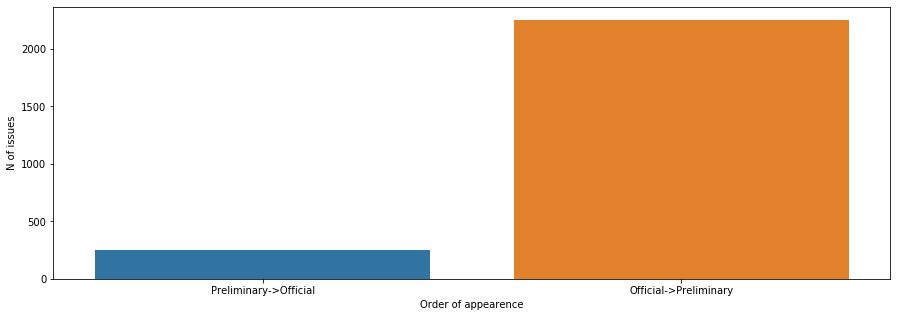

In [64]:
plt.figure(figsize=(15,5))
tmp = [("Preliminary->Official",len(w[w.Preliminary_release_date<w.Official_release_date])), ("Official->Preliminary",len(w[w.Preliminary_release_date>=w.Official_release_date]))]
tmpDf = pd.DataFrame(tmp, columns=["Order of appearence", "N of issues"])
sns.barplot(x="Order of appearence", y="N of issues", data=tmpDf)

**Observation**
* More bugs are introduced in official releases and then persist into a preliminary one other than the other way around

## Correlations

### Topic labels

Let's calculate the correlation for the relative nuber of issue per each topic label over each major version of the software

In [65]:
list_of_series = []
for i in range(len(versions)):
    issues_for_version = ilpr[ilpr.label.str.startswith(f"v{versions[i]}")].id.unique()
    issues_type_for_version = (ilpr[ilpr.id.isin(issues_for_version) & 
                               ilpr.label.isin(topic_labels)].groupby("label").id.count() / len(issues_for_version)).sort_values(ascending=False)
    list_of_series.append(issues_type_for_version)
df = pd.concat(list_of_series, axis=1, sort=True).transpose()
df = df.set_index([pd.Index(versions)])
df = df.fillna(0)

In [66]:
s = (df > 0).sum()
ind = s[s > len(versions) - 1].index

Let's visualize the correlation matrix

In [67]:
df[ind].corr()

,:Core/Features/Indices APIs,:Core/Features/Stats,:Core/Infra/Core,:Core/Infra/Packaging,:Core/Infra/Plugins,:Core/Infra/REST API,:Core/Infra/Settings,:Core/Infra/Transport API,:Distributed/CRUD,:Distributed/Distributed,:Distributed/Engine,:Docs,:Search/Highlighting,:Search/Mapping,:Search/Search,:Search/Suggesters
:Core/Features/Indices APIs,1.000000,0.215686,0.708466,0.474316,0.244135,0.141957,0.215230,-0.052649,0.538723,0.472949,0.625733,0.783010,0.047745,0.400235,0.519935,0.107370
:Core/Features/Stats,0.215686,1.000000,0.762719,0.883514,0.876494,0.943086,0.721122,0.885474,0.732704,0.832916,0.572353,-0.402192,0.937653,0.950193,0.895616,0.817158
:Core/Infra/Core,0.708466,0.762719,1.000000,0.865300,0.711870,0.731406,0.630652,0.547847,0.811844,0.918890,0.908441,0.252438,0.662958,0.834499,0.947211,0.645698
:Core/Infra/Packaging,0.474316,0.883514,0.865300,1.000000,0.917083,0.863220,0.725755,0.624908,0.854440,0.787264,0.616640,-0.049295,0.862762,0.957858,0.870475,0.526313
:Core/Infra/Plugins,0.244135,0.876494,0.711870,0.917083,1.000000,0.953244,0.912343,0.578610,0.911794,0.770900,0.410877,-0.255848,0.954670,0.847721,0.818136,0.521314
:Core/Infra/REST API,0.141957,0.943086,0.731406,0.863220,0.953244,1.000000,0.893659,0.747832,0.841760,0.862997,0.518367,-0.390741,0.987917,0.853475,0.883358,0.738843
:Core/Infra/Settings,0.215230,0.721122,0.630652,0.725755,0.912343,0.893659,1.000000,0.389818,0.929643,0.791258,0.376120,-0.173908,0.852790,0.614686,0.769204,0.500653
:Core/Infra/Transport API,-0.052649,0.885474,0.547847,0.624908,0.578610,0.747832,0.389818,1.000000,0.347839,0.651353,0.509532,-0.602041,0.760773,0.799830,0.704805,0.891628
:Distributed/CRUD,0.538723,0.732704,0.811844,0.854440,0.911794,0.841760,0.929643,0.347839,1.000000,0.836441,0.541603,0.108946,0.788240,0.731083,0.852246,0.447272
:Distributed/Distributed,0.472949,0.832916,0.918890,0.787264,0.770900,0.862997,0.791258,0.651353,0.836441,1.000000,0.840371,-0.008172,0.783915,0.778179,0.982336,0.820310


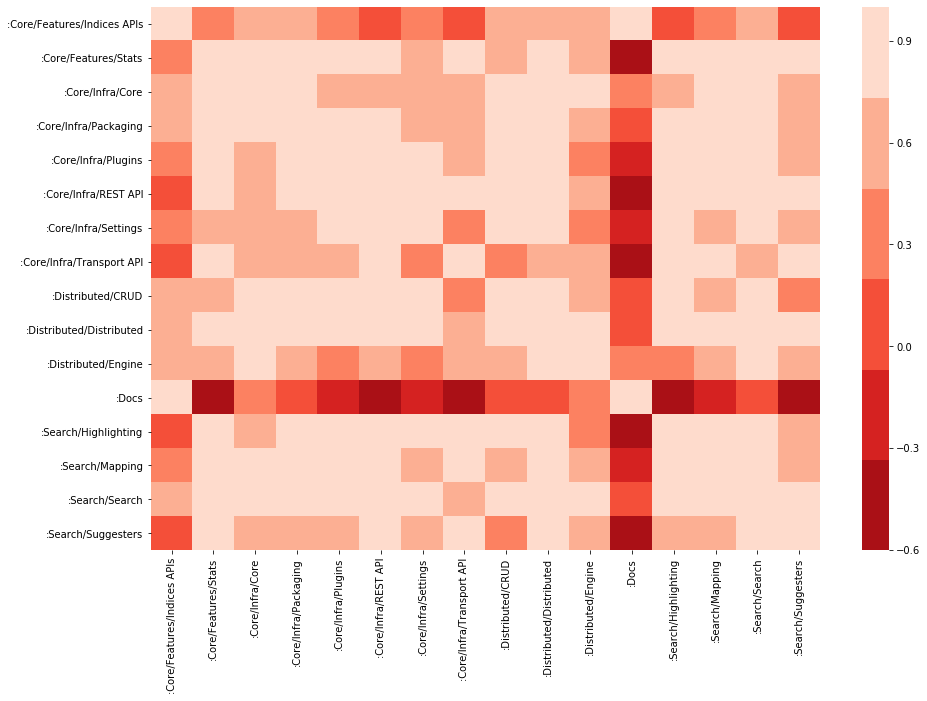

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(df[ind].corr(), cmap=sns.color_palette("Reds_r"))

In [69]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)
len(so[so==1]) - len(df)

73

There are 73 unique pairs of topic labels with perfect correlation.
This is odd, so let's inspect one of them.

In [70]:
df[[":Search/Suggesters",":Core/Features/Stats"]]

,:Search/Suggesters,:Core/Features/Stats
0,0.001508,0.001005
1,0.008062,0.010964
2,0.006586,0.017124
5,0.005485,0.014104
6,0.004300,0.006902
7,0.003106,0.005542


We can see that the perfect correlation is due to the absence of both labels in many versions.
These labels may even be new labels which have been both introduced in version 7. 
This correlation matrix as it is (overwhelmingly full of perfectly correlated labels which are not present in many versions), does not help us in identifying significant correlated labels

### Category labels

In [71]:
list_of_series = []
for i in range(len(versions)):
    issues_for_version = ilpr[ilpr.label.str.startswith(f"v{versions[i]}")].id.unique()
    issues_type_for_version = (ilpr[ilpr.id.isin(issues_for_version) & 
                               ilpr.label.isin(category_labels)].groupby("label").id.count() / len(issues_for_version)).sort_values(ascending=False)
    list_of_series.append(issues_type_for_version)
df = pd.concat(list_of_series, axis=1, sort=True).transpose()
df = df.set_index([pd.Index(versions)])
df = df.fillna(0)
df.head()

,>breaking,>breaking-java,>bug,>deprecation,>docs,>enhancement,>feature,>non-issue,>refactoring,>regression,>test,>test-failure,>test-mute,>upgrade
0,0.053769,0.000000,0.375377,0.000000,0.007035,0.448241,0.134673,0.006030,0.000000,0.006030,0.005528,0.000000,0.000000,0.000503
1,0.045792,0.000000,0.397291,0.006772,0.046114,0.377943,0.051596,0.006772,0.000000,0.008062,0.059336,0.000000,0.000000,0.011609
2,0.057958,0.000220,0.323381,0.009001,0.063886,0.365093,0.038419,0.013611,0.000000,0.004830,0.090231,0.002634,0.000000,0.020637
5,0.032321,0.023898,0.221939,0.012733,0.108521,0.293634,0.020568,0.119687,0.000000,0.003330,0.101469,0.008031,0.000196,0.016063
6,0.019688,0.009391,0.208871,0.012220,0.157502,0.214302,0.020367,0.173456,0.027608,0.002602,0.115071,0.029984,0.002489,0.011088


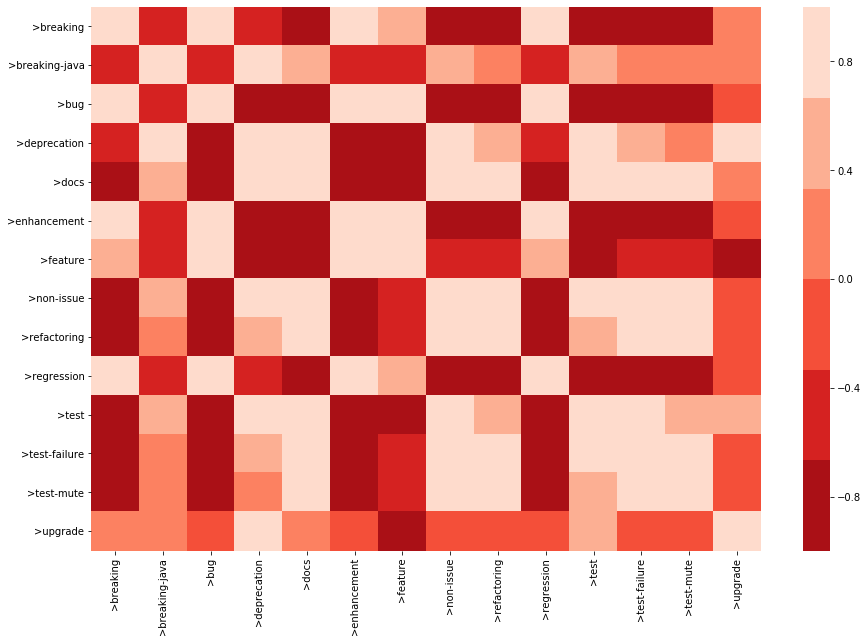

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap=sns.color_palette("Reds_r"))

Let's inspect the perfectly positive correlated categories

In [73]:
c = df.corr()
s = c.unstack()
so = s.sort_values(ascending=False)
len(so[so==1]) - len(df)

8

In [74]:
so[so==1]

>upgrade        >upgrade          1.0
>test-mute      >test-mute        1.0
>breaking-java  >breaking-java    1.0
>bug            >bug              1.0
>deprecation    >deprecation      1.0
>docs           >docs             1.0
>enhancement    >enhancement      1.0
>feature        >feature          1.0
>non-issue      >non-issue        1.0
>refactoring    >refactoring      1.0
>regression     >regression       1.0
>test           >test             1.0
>test-failure   >test-failure     1.0
>breaking       >breaking         1.0
dtype: float64

In this case all the pairs with perfect correlation are self-correlated variables, so we skip them

In [75]:
so[(so > 0.95) & (so < 1)]

>regression   >bug            0.971871
>bug          >regression     0.971871
>deprecation  >test           0.965972
>test         >deprecation    0.965972
>refactoring  >test-mute      0.965327
>test-mute    >refactoring    0.965327
>non-issue    >docs           0.956833
>docs         >non-issue      0.956833
dtype: float64

In [76]:
df[[">regression",">bug"]]

,>regression,>bug
0,0.006030,0.375377
1,0.008062,0.397291
2,0.004830,0.323381
5,0.003330,0.221939
6,0.002602,0.208871
7,0.001340,0.143797


The correlation matrix shows a strong correlation among
* Regression and bug
* Deprecated and test
* Refactoring and test

to name a few. This means that these types have followed a similar trend throughout versions: e.g. when regression issues increased, so did bugs labeled issues.

In [77]:
so[(so < -0.95)]

>enhancement  >non-issue     -0.960379
>non-issue    >enhancement   -0.960379
>bug          >non-issue     -0.964881
>non-issue    >bug           -0.964881
              >breaking      -0.969544
>breaking     >non-issue     -0.969544
>feature      >deprecation   -0.971680
>deprecation  >feature       -0.971680
>test         >feature       -0.972340
>feature      >test          -0.972340
>enhancement  >docs          -0.997137
>docs         >enhancement   -0.997137
dtype: float64

In [78]:
df[[">feature",">test"]]

,>feature,>test
0,0.134673,0.005528
1,0.051596,0.059336
2,0.038419,0.090231
5,0.020568,0.101469
6,0.020367,0.115071
7,0.019429,0.113040


On the other hand, categories pairs such as
* docs and enhancement
* feature and test
* deprecation and feature

Have followed opposite trends: e.g versions which experienced an increase in docs issues, did present a decrease in enhancement issues.

**Observations**
Correlation among topics did not lead to any result as the original matrix was too sparse and this resulted in many labels to be perfectly correlated thanks to their absence (possibly because they did not exist as labels back then) in the same versions.
Correlation among categories did show some interesting relationships.
* Positive: regression and bug has been decreasing since version 0. This can possibly the result of some action taken by the developers (i.e implementing regression testing)
* Negative: percentage of requests for features have decreased overtime, while the ones for tests have been increased. This can be the sign of a mature product: which needs less new features and values testing more and more over time. 

### Number of unique labels over time

In [79]:
tags

,Tag,Sha,Date
0,v7.9.0,a479a2a7fce0389512d6a9361301708b92dff667,2020-08-11 16:42:47
1,v7.8.1,b5ca9c58fb664ca8bf9e4057fc229b3396bf3a89,2020-07-21 12:13:59
2,v7.8.0,757314695644ea9a1dc2fecd26d1a43856725e65,2020-06-12 22:39:07
3,v7.7.1,ad56dce891c901a492bb1ee393f12dfff473a423,2020-05-28 13:52:12
4,v7.7.0,81a1e9eda8e6183f5237786246f6dced26a10eaf,2020-05-08 23:11:19
...,...,...,...
275,v0.7.0,797cb66dbeb57098fdab0ec34dc0958ff2a05640,2010-05-14 20:15:53
276,v0.6.0,9549b9c2d3cd4151a03bacebea13b96b19478291,2010-04-09 14:06:09
277,v0.5.1,79e1df14e0a4223bdfdf9ac53f533b6ee9e272ba,2010-03-09 11:30:49
278,v0.5.0,f4f26d2118b1bc6f0d895ba990ede22b02e731b4,2010-03-05 14:05:08


In [93]:
tags["Month"] = tags.Date.dt.month
tags["Year"] = tags.Date.dt.year

In [94]:
tags

,Tag,Sha,Date,Month,Year
0,v7.9.0,a479a2a7fce0389512d6a9361301708b92dff667,2020-08-11 16:42:47,8,2020
1,v7.8.1,b5ca9c58fb664ca8bf9e4057fc229b3396bf3a89,2020-07-21 12:13:59,7,2020
2,v7.8.0,757314695644ea9a1dc2fecd26d1a43856725e65,2020-06-12 22:39:07,6,2020
3,v7.7.1,ad56dce891c901a492bb1ee393f12dfff473a423,2020-05-28 13:52:12,5,2020
4,v7.7.0,81a1e9eda8e6183f5237786246f6dced26a10eaf,2020-05-08 23:11:19,5,2020
...,...,...,...,...,...
275,v0.7.0,797cb66dbeb57098fdab0ec34dc0958ff2a05640,2010-05-14 20:15:53,5,2010
276,v0.6.0,9549b9c2d3cd4151a03bacebea13b96b19478291,2010-04-09 14:06:09,4,2010
277,v0.5.1,79e1df14e0a4223bdfdf9ac53f533b6ee9e272ba,2010-03-09 11:30:49,3,2010
278,v0.5.0,f4f26d2118b1bc6f0d895ba990ede22b02e731b4,2010-03-05 14:05:08,3,2010


In [99]:
issues

,title,created_at,user
id,,,
682740346,[7.9] [DOCS] Fix EQL threat detection example ...,2020-08-20 13:58:10,jrodewig
682739786,[7.x] [DOCS] Fix EQL threat detection example ...,2020-08-20 13:57:22,jrodewig
682737733,[DOCS] [7.8] Adding ignore_unavailable param. ...,2020-08-20 13:54:35,lockewritesdocs
682734621,[DOCS] [7.9] Adding ignore_unavailable param. ...,2020-08-20 13:50:36,lockewritesdocs
682732176,[DOCS] [7.x] Adding ignore_unavailable param. ...,2020-08-20 13:47:21,lockewritesdocs
...,...,...,...
23083082,Consistency between `_search` and `_msearch`,2013-11-21 17:33:06,ofavre
20864348,ActionResponse should implement ToXContentObject,2013-10-11 11:52:52,s1monw
20743479,"Get document API can specify an alias, but wil...",2013-10-09 13:56:33,ccw-morris


In [100]:
ilpr

,id,label
0,681010786,backport
1,681010786,v7.9.1
2,681010233,backport
3,681010233,v7.10.0
4,680841671,:ml
...,...,...
166760,1400233,:Distributed/Distributed
166761,1400233,>feature
166762,1400233,Team:Distributed
166763,1400233,high hanging fruit


In [102]:
ilpr = pd.merge(ilpr, issues, on="id")

In [103]:
ilpr

,id,label,title,created_at,user
0,681010786,backport,[7.9][DOCS] Fix typo in Java HLRC docs (#60863),2020-08-18 12:41:50,jrodewig
1,681010786,v7.9.1,[7.9][DOCS] Fix typo in Java HLRC docs (#60863),2020-08-18 12:41:50,jrodewig
2,681010233,backport,[7.x] [DOCS] Fix typo in Java HLRC docs (#60863),2020-08-18 12:40:59,jrodewig
3,681010233,v7.10.0,[7.x] [DOCS] Fix typo in Java HLRC docs (#60863),2020-08-18 12:40:59,jrodewig
4,680841671,:ml,[7.x] [DOCS] Replaces ml.node with node.roles:...,2020-08-18 09:25:11,szabosteve
...,...,...,...,...,...
166931,1400233,:Distributed/Distributed,Changes API,2011-08-13 15:45:14,Vineeth-Mohan
166932,1400233,>feature,Changes API,2011-08-13 15:45:14,Vineeth-Mohan
166933,1400233,Team:Distributed,Changes API,2011-08-13 15:45:14,Vineeth-Mohan
166934,1400233,high hanging fruit,Changes API,2011-08-13 15:45:14,Vineeth-Mohan


In [105]:
ilpr["Month"] = ilpr.created_at.dt.month
ilpr["Year"] = ilpr.created_at.dt.year

In [106]:
ilpr

,id,label,title,created_at,user,Month,Year
0,681010786,backport,[7.9][DOCS] Fix typo in Java HLRC docs (#60863),2020-08-18 12:41:50,jrodewig,8,2020
1,681010786,v7.9.1,[7.9][DOCS] Fix typo in Java HLRC docs (#60863),2020-08-18 12:41:50,jrodewig,8,2020
2,681010233,backport,[7.x] [DOCS] Fix typo in Java HLRC docs (#60863),2020-08-18 12:40:59,jrodewig,8,2020
3,681010233,v7.10.0,[7.x] [DOCS] Fix typo in Java HLRC docs (#60863),2020-08-18 12:40:59,jrodewig,8,2020
4,680841671,:ml,[7.x] [DOCS] Replaces ml.node with node.roles:...,2020-08-18 09:25:11,szabosteve,8,2020
...,...,...,...,...,...,...,...
166931,1400233,:Distributed/Distributed,Changes API,2011-08-13 15:45:14,Vineeth-Mohan,8,2011
166932,1400233,>feature,Changes API,2011-08-13 15:45:14,Vineeth-Mohan,8,2011
166933,1400233,Team:Distributed,Changes API,2011-08-13 15:45:14,Vineeth-Mohan,8,2011
166934,1400233,high hanging fruit,Changes API,2011-08-13 15:45:14,Vineeth-Mohan,8,2011


In [117]:
cnt = ilpr.groupby(["Year", "Month"]).label.nunique()

In [121]:
x = cnt.reset_index()

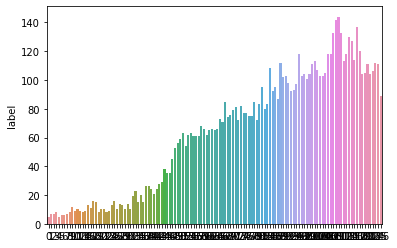

In [122]:
sns.barplot(x=x.index, y=x.label)

In [123]:
x

,Year,Month,label
0,2010,2,5
1,2010,3,7
2,2010,4,7
3,2010,5,8
4,2010,6,5
...,...,...,...
122,2020,4,104
123,2020,5,106
124,2020,6,112
125,2020,7,111
